In [10]:
import pandas as pd
from utilities import CohortDateMapper

import question_3af as q3
import question_3gh as q3_end
import question_4 as q4
import question_6 as q6



customer_df = pd.read_excel('data/customer_data.xlsx')

cdm = CohortDateMapper(customer_df)

customer_df

,cohort,user,time_year,time_month,subscription,content,genres,recency_new,bounce
0,0,0,2017,8,1,2.0,2.0,1.0000,0.5000
1,0,0,2017,9,1,1.0,1.0,1.0000,0.0000
2,0,1,2017,8,1,1.0,1.0,0.0000,1.0000
3,0,1,2017,9,1,1.0,1.0,0.0000,0.5000
4,0,2,2017,8,1,12.0,4.0,0.2500,0.0000
...,...,...,...,...,...,...,...,...,...
31672,11,20170,2018,7,1,2.0,2.0,0.5000,1.0000
31673,11,20171,2018,7,1,3.0,2.0,0.3333,0.6667
31674,11,20172,2018,7,1,1.0,1.0,1.0000,1.0000
31675,11,20173,2018,7,1,4.0,3.0,0.2500,0.0000


In [11]:
rev_per_month_per_user = 10
discount_rate_annual = 0.15
discount_rate_monthly = (1 + discount_rate_annual)**(1/12) - 1
discount_rate_monthly

0.01171491691985338

In [12]:
#7a clv of customer with time horizon one year
avg_retention_rates_across_cohorts = \
    q3_end.calculate_avg_retention_rates_across_cohorts(customer_df, cdm)

#replace last none with zero
avg_retention_rates_across_cohorts[-1] = 0.5
clv_dynamic = q6.calc_dynamic_clv(avg_retention_rates_across_cohorts, rev_per_month_per_user, discount_rate_monthly)
clv_dynamic_sum = clv_dynamic * 10_000
clv_dynamic_sum

159746.84811799013

In [4]:
#7d
import math

def forecast_future_retention_rates(month):
    return 0.9*(1-math.exp(-0.3*month))

forecasts_rr_year_2 = [forecast_future_retention_rates(month) for month in range(0, 24)]
forecasts_rr_year_2

[0.0,
 0.2332636013864539,
 0.40606952751537617,
 0.5340873062334607,
 0.6289252092790181,
 0.6991828558664132,
 0.7512310006005721,
 0.7897892145723163,
 0.8183538420395288,
 0.8395150385342253,
 0.8551916384689224,
 0.8668051493388841,
 0.8754086497974367,
 0.8817822796987761,
 0.8865039808615701,
 0.890001903115582,
 0.892593227655882,
 0.894512928091036,
 0.8959350771516487,
 0.8969886310882759,
 0.8977691230410003,
 0.898347325700674,
 0.8987756687662068,
 0.8990929931138563]

In [5]:
#7e I: get data
rr_0 = q3.calculate_retention_rates_of_cohort_i(customer_df, 0, cdm)

forecast_no_offset_ind, forecast_no_offset = range(0, 24), forecasts_rr_year_2
forecast_offset_2_ind, forecast_offset_2 = range(2, 24), forecasts_rr_year_2[:22]
retention_rate_0_ind, retention_rate_0 = range(0, 12), [rr_0[period] for period in range(0,12)]


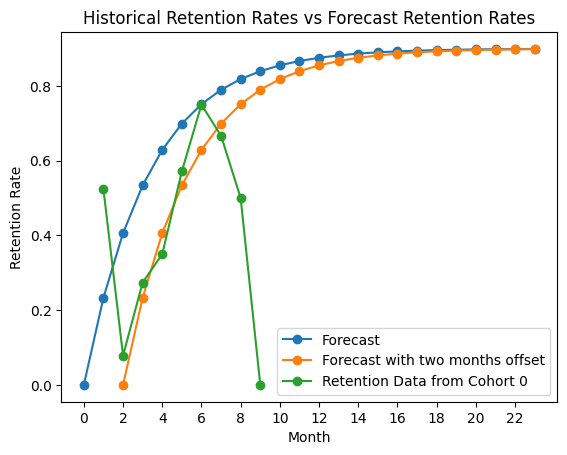

In [6]:
#7e II: plot data
import matplotlib.pyplot as plt

# Create a plot
plt.xticks(range(0, 24, 2))
plt.plot(forecast_no_offset_ind, forecast_no_offset, marker='o', label="Forecast")
plt.plot(forecast_offset_2_ind, forecast_offset_2, marker='o', label="Forecast with two months offset")
plt.plot(retention_rate_0_ind, retention_rate_0, marker='o', label="Retention Data from Cohort 0")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.title('Historical Retention Rates vs Forecast Retention Rates')

# Display the plot
plt.legend()
plt.show()

In [8]:
#7f old version: result 15.119068116317383

avg_retention_rates_across_cohorts = \
    q3_end.calculate_avg_retention_rates_across_cohorts(customer_df, cdm)
avg_retention_rates_across_cohorts[-1] = 0.5
retentionrates_2_years = avg_retention_rates_across_cohorts + forecasts_rr_year_2

clv_2_years = q6.calc_dynamic_clv(retentionrates_2_years, rev_per_month_per_user, discount_rate_monthly)
clv_2_years

15.974684811799014

In [13]:
#7f new version which uses forecasts earlier instead of unreliable historical data

avg_retention_rates_across_cohorts = \
    q3_end.calculate_avg_retention_rates_across_cohorts(customer_df, cdm)
avg_retention_rates_across_cohorts[-1] = 0.5
retentionrates_2_years = avg_retention_rates_across_cohorts[:7] + forecasts_rr_year_2[7:]

clv_2_years = q6.calc_dynamic_clv(retentionrates_2_years, rev_per_month_per_user, discount_rate_monthly)
clv_2_years

16.060758668552282